# Análisis Forraje k-Nearest Neighbor

# Conclusion: Como los datos tenian cierta agrupacion se penso que quizas este algoritmo funcionaria, pero NO. 

## Realizamos importaciones

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

## PRUEBA 1

## Leemos nuestro archivo de entrada

Hay que tener en cuenta que son solo 200 puntos y que solo estan relacionados con dos sondas (porque en gastre hay dos sondas del INTA pero no tienen nada de datos y tampoco tienen de los años que necesitamos)

In [22]:
dataframe = pd.read_csv('datos/csv/datos_forraje_3_sondas.csv', sep=",")
dataframe.head(10)

,feacha,codigo_gps,coordenada_completa,latitud,longitug,fn_valor_pastoral,dist_laguna_fría,distancia_telsen,dist_gastre,sonda_cercana,sonda_real,acum_anual,acum_verano,tem_max,tem_min,tem_med,viento,humedad
0,11/2015,CG T01,-68.7056907/-43.291952,-43.291952,-68.705691,3.6,1.437643,2.597643,0.477643,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
1,11/2015,CG T02,-68.6608421/-43.2535963,-43.253596,-68.660842,0.6,1.354438,2.514438,0.394438,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
2,11/2015,CG T03,-68.616647/-43.2181445,-43.218145,-68.616647,1.6,1.274792,2.434792,0.314792,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
3,11/2015,CG T04,-68.6180901/-43.1667136,-43.166714,-68.618090,8.0,1.224804,2.384804,0.264804,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
4,11/2015,CG T05,-68.6390379/-43.1237455,-43.123745,-68.639038,4.4,1.202783,2.362783,0.242783,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
5,11/2015,CG T06,-68.577095/-43.0961252,-43.096125,-68.577095,5.8,1.113220,2.273220,0.153220,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
6,11/2015,CG T07,-68.548786/-43.0680802,-43.068080,-68.548786,0.4,1.056866,2.216866,0.096866,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
7,11/2015,CG T08,-68.5672935/-43.0167808,-43.016781,-68.567294,2.0,1.024074,2.184074,0.064074,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
8,11/2015,CG T09,-68.5778347/-42.9668535,-42.966853,-68.577835,3.8,0.984688,2.144688,0.024688,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
9,11/2015,CG T10,-68.6397752/-42.9387177,-42.938718,-68.639775,1.8,1.018493,2.178493,0.058493,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7


In [23]:
dataframe.describe()

,latitud,longitug,fn_valor_pastoral,dist_laguna_fría,distancia_telsen,dist_gastre,acum_anual,acum_verano,tem_max,tem_min,tem_med,viento,humedad
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,-42.740748,-67.915592,8.758000,0.917748,1.420959,0.959369,206.706000,39.439000,15.886500,4.648500,10.28950,10.488500,50.619000
std,0.290505,0.912005,5.935147,0.485753,0.793833,0.947505,72.859119,19.817349,2.519685,1.698062,2.10578,3.263629,3.536989
min,-43.313997,-69.216771,0.000000,0.047987,0.000160,0.011856,119.800000,13.700000,14.300000,2.600000,8.50000,5.100000,40.900000
25%,-42.923910,-68.577835,3.800000,0.535329,0.718245,0.169017,142.300000,13.700000,14.300000,3.900000,9.10000,6.300000,48.600000
50%,-42.664940,-68.102476,8.300000,1.011893,1.536611,0.583389,185.200000,47.900000,14.300000,3.900000,9.10000,12.000000,52.100000
75%,-42.519414,-67.349483,12.850000,1.173102,2.179888,1.779100,288.100000,58.200000,19.800000,7.200000,13.60000,12.000000,52.100000
max,-42.364297,-65.944623,29.400000,2.013430,2.597643,2.973430,304.100000,58.200000,20.000000,7.300000,13.60000,14.200000,53.700000


Son 200 registros.

El valor pastoral va del 0.4 al 29.4,con una media de 8.75 y a partir del desvío estándar podemos ver que la mayoría están entre 8.75-5.93 y 8.75+5.93.

El acumulado anual va de 119.8  hasta 304.1, con una media de 206.7 y a partir del desvío estándar podemos ver que la mayoría están entre 206.7-72.85 y 206.7+72.85.

## Rápidas visualizaciones

Veamos unas gráficas simples y qué información nos aportan:

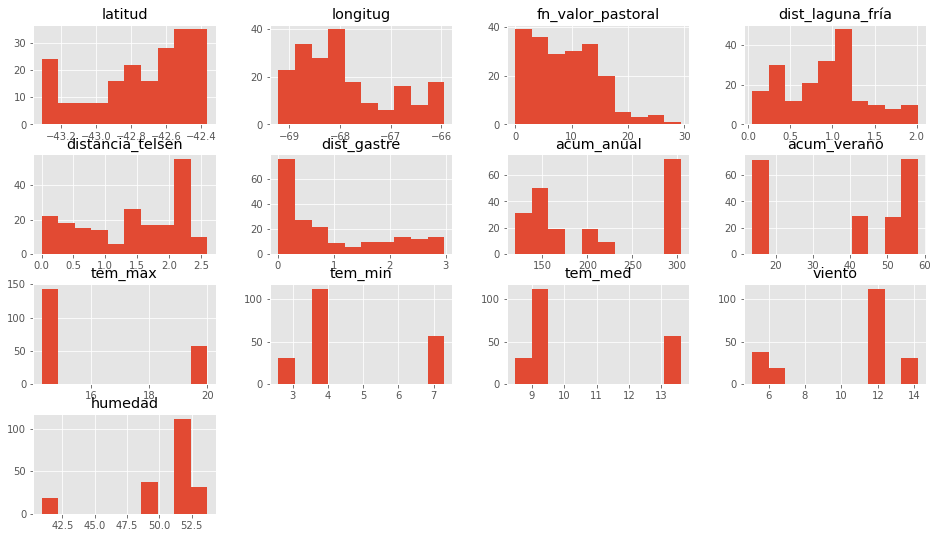

In [24]:
dataframe.hist()
plt.show()

Vemos que la distribuciones en la mayoria de los datos no está balanceada… esto no es bueno. Convendría tener las mismas cantidades en las salidas, para no tener resultados “tendenciosos”. 

## Preparamos el dataset

Creamos nuestro X e y de entrada y los sets de entrenamiento y test.

In [25]:
X = dataframe[['acum_anual','acum_verano', 'tem_max', 'tem_min', 'tem_med', 'viento', 'humedad']].values
y = dataframe['fn_valor_pastoral'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Veamos la forma de los datos (solo graficamos lluvia anual y valor pastoral)

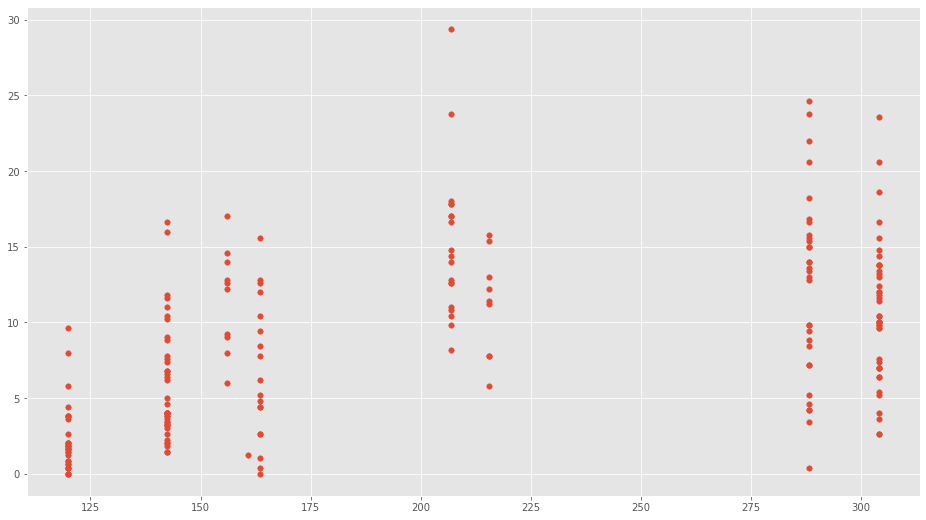

In [42]:
colores=['orange','blue']
tamanios=[30,60]

f1 = dataframe['acum_anual'].values
f2 = dataframe['fn_valor_pastoral'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de cantidad de lluvia
asignar=[]
for index, row in dataframe.iterrows():
    if(row['acum_anual']>206):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, s=tamanios[0])
plt.show()

## Cómo obtener el mejor valor de k

(sobre todo importante para desempatar o elegir los puntos frontera!)

El el código que viene a continuación, vemos distintos valores k y la precisión obtenida.

([<matplotlib.axis.XTick at 0x7fda9b9b2c10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

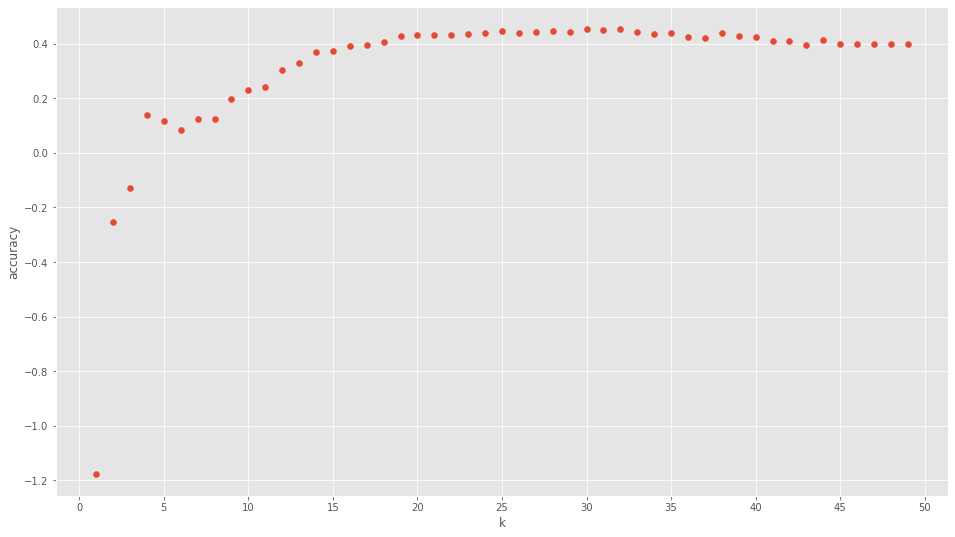

In [26]:
k_range = range(1, 50)
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50])

En la gráfica vemos que con valores k>=15 es donde mayor precisión se logra, y la misma es super baja.

## Creamos el Modelo

Usemos k-Nearest Neighbor con Scikit Learn

Definimos el valor de k en 15 y creamos nuestro modelo.

In [28]:
n_neighbors = 15

knn = KNeighborsRegressor(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Y_pred_multiple = knn.predict(X_test)

print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test, Y_pred_multiple),4)))
print('MAE:')
print(str(round(mean_absolute_error(y_test, Y_pred_multiple),4)))
print('MSE:')
print(str(round(mean_squared_error(y_test, Y_pred_multiple),4)))
print('RMSE:')
print(str(np.sqrt(round(mean_squared_error(y_test, Y_pred_multiple),4))))
print('R2:')
print(str(round(r2_score(y_test, Y_pred_multiple),4)))


Accuracy of K-NN classifier on training set: 0.43
Accuracy of K-NN classifier on test set: 0.37
Varianza Explicada:
0.3746
MAE:
3.4837
MSE:
20.0608
RMSE:
4.478928443277477
R2:
0.3718


Vemos que la precisión que nos da es de 43% en el set de entrenamiento y del 37% para el de test.

## METRICAS UTILIZADAS

- *Varianza explicada*: Representa el porcentaje de la varianza de la variable de salida que es explicado por el modelo. O sea esta métrica evalúa la variación o dispersión de los puntos de datos. **explained_variance_score** La mejor puntuación posible es 1.0,los valores más bajos son peores. 
- *Error medio absoluto*: Es la media de las diferencias absolutas entre el valor objetivo y el predicho. Al no elevar al cuadrado, no penaliza los errores grandes, lo que la hace no muy sensible a valores anómalos, por lo que no es una métrica recomendable en modelos en los que se deba prestar atención a éstos. **mean_absolute_error MAE** Mientras mas cercano a cero mejor.
- *Error cuadrático medio*: Es simplemente la media de las diferencias entre el valor objetivo y el predicho al cuadrado. Al elevar al cuadrado los errores, magnifica los errores grandes, por lo que hay que utilizarla con cuidado cuando tenemos valores anómalos en nuestro conjunto de datos. **mean_squared_error MSE** Mientras mas cercano a cero mejor.Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *Raíz cuadrada de la media del error al cuadrado*: Es igual a la raíz cuadrada de la métrica anterior. La ventaja de esta métrica es que presenta el error en las mismas unidades que la variable objetivo, lo que la hace más fácil de entender. **RMSE**. Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *R cuadrado*: también llamado coeficiente de determinación. Esta métrica difiere de las anteriores, ya que compara nuestro modelo con un modelo básico que siempre devuelve como predicción la media de los valores objetivo de entrenamiento. La comparación entre estos dos modelos se realiza en base a la media de los errores al cuadrado de cada modelo. Los valores que puede tomar esta métrica van desde menos infinito a 1. **r2_score R2** Cuanto más cercano a 1 sea el valor de esta métrica, mejor será nuestro modelo. 

## PRUEBA 2

## Leemos nuestro archivo de entrada

Hay que tener en cuenta que son solo 200 puntos y que solo estan relacionados con dos sondas (porque en gastre hay dos sondas del INTA pero no tienen nada de datos y tampoco tienen de los años que necesitamos)

In [29]:
df = pd.read_csv('datos/csv/datos_forraje_3_sondas.csv', sep=",")
df

,feacha,codigo_gps,coordenada_completa,latitud,longitug,fn_valor_pastoral,dist_laguna_fría,distancia_telsen,dist_gastre,sonda_cercana,sonda_real,acum_anual,acum_verano,tem_max,tem_min,tem_med,viento,humedad
0,11/2015,CG T01,-68.7056907/-43.291952,-43.291952,-68.705691,3.6,1.437643,2.597643,0.477643,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
1,11/2015,CG T02,-68.6608421/-43.2535963,-43.253596,-68.660842,0.6,1.354438,2.514438,0.394438,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
2,11/2015,CG T03,-68.616647/-43.2181445,-43.218145,-68.616647,1.6,1.274792,2.434792,0.314792,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
3,11/2015,CG T04,-68.6180901/-43.1667136,-43.166714,-68.618090,8.0,1.224804,2.384804,0.264804,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
4,11/2015,CG T05,-68.6390379/-43.1237455,-43.123745,-68.639038,4.4,1.202783,2.362783,0.242783,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,01/2017,CT2 T21,-65.9446227/-42.6019474,-42.601947,-65.944623,15.4,2.013430,0.853430,2.973430,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
196,01/2017,CT2 T22,-65.9904844/-42.577312,-42.577312,-65.990484,11.2,1.992204,0.832204,2.952204,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
197,01/2017,CT2 T23,-66.0338334/-42.5443476,-42.544348,-66.033833,13.0,1.981819,0.821819,2.941819,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
198,01/2017,CT2 T24,-66.082257/-42.5184357,-42.518436,-66.082257,11.4,1.959307,0.799307,2.919307,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6


Eliminamos las columnas que no necesitamos

In [30]:
df = df.drop(['codigo_gps', 'coordenada_completa', 'latitud','longitug', 'dist_laguna_fría','distancia_telsen','dist_gastre'], axis=1)
df

,feacha,fn_valor_pastoral,sonda_cercana,sonda_real,acum_anual,acum_verano,tem_max,tem_min,tem_med,viento,humedad
0,11/2015,3.6,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
1,11/2015,0.6,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
2,11/2015,1.6,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
3,11/2015,8.0,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
4,11/2015,4.4,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
...,...,...,...,...,...,...,...,...,...,...,...
195,01/2017,15.4,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
196,01/2017,11.2,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
197,01/2017,13.0,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
198,01/2017,11.4,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6


Agrupamos los datos por el acumulado de lluvia anual. La idea es saber el promedio de valor pastoral con tantos mm de lluvia anual.

In [31]:
df = df.groupby(by='acum_anual',as_index=False).mean()
df

,acum_anual,fn_valor_pastoral,acum_verano,tem_max,tem_min,tem_med,viento,humedad
0,119.8,2.245161,13.7,14.3,2.6,8.5,14.2,53.7
1,142.3,5.865000,13.7,14.3,3.9,9.1,12.0,52.1
2,156.1,11.540000,42.3,19.8,7.2,13.6,5.1,48.6
3,160.7,1.200000,42.3,20.0,7.3,13.6,6.3,40.9
4,163.5,6.700000,42.3,20.0,7.3,13.6,6.3,40.9
5,206.9,15.200000,53.5,19.8,7.2,13.6,5.1,48.6
6,215.6,11.155556,53.5,19.8,7.2,13.6,5.1,48.6
7,288.1,12.348387,58.2,14.3,3.9,9.1,12.0,52.1
8,304.1,10.687805,58.2,14.3,3.9,9.1,12.0,52.1


In [32]:
df.describe()

,acum_anual,fn_valor_pastoral,acum_verano,tem_max,tem_min,tem_med,viento,humedad
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,195.233333,8.549101,41.966667,17.400000,5.611111,11.533333,8.677778,48.622222
std,64.469159,4.787414,17.289520,2.941938,1.972590,2.457641,3.763568,4.760981
min,119.800000,1.200000,13.700000,14.300000,2.600000,8.500000,5.100000,40.900000
25%,156.100000,5.865000,42.300000,14.300000,3.900000,9.100000,5.100000,48.600000
50%,163.500000,10.687805,42.300000,19.800000,7.200000,13.600000,6.300000,48.600000
75%,215.600000,11.540000,53.500000,19.800000,7.200000,13.600000,12.000000,52.100000
max,304.100000,15.200000,58.200000,20.000000,7.300000,13.600000,14.200000,53.700000


## Rápidas visualizaciones

Veamos unas gráficas simples y qué información nos aportan:

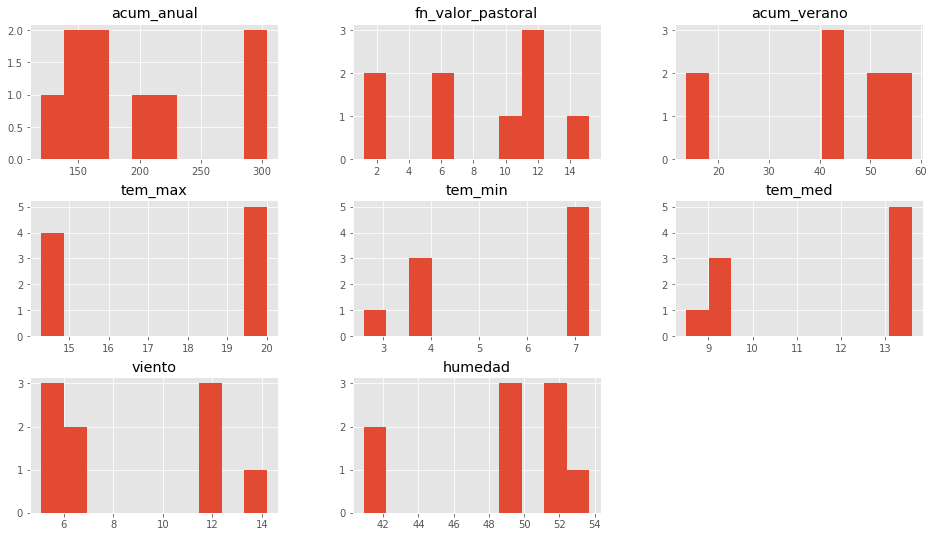

In [33]:
df.hist()
plt.show()

Vemos que la distribuciones en la mayoria de los datos no está balanceada… esto no es bueno. Convendría tener las mismas cantidades en las salidas, para no tener resultados “tendenciosos”. 

## Preparamos el dataset

Creamos nuestro X e y de entrada y los sets de entrenamiento y test.

In [34]:
X = df[['acum_anual','acum_verano', 'tem_max', 'tem_min', 'tem_med', 'viento', 'humedad']].values
y = df['fn_valor_pastoral'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Veamos la forma de los datos (solo graficamos lluvia anual y valor pastoral)

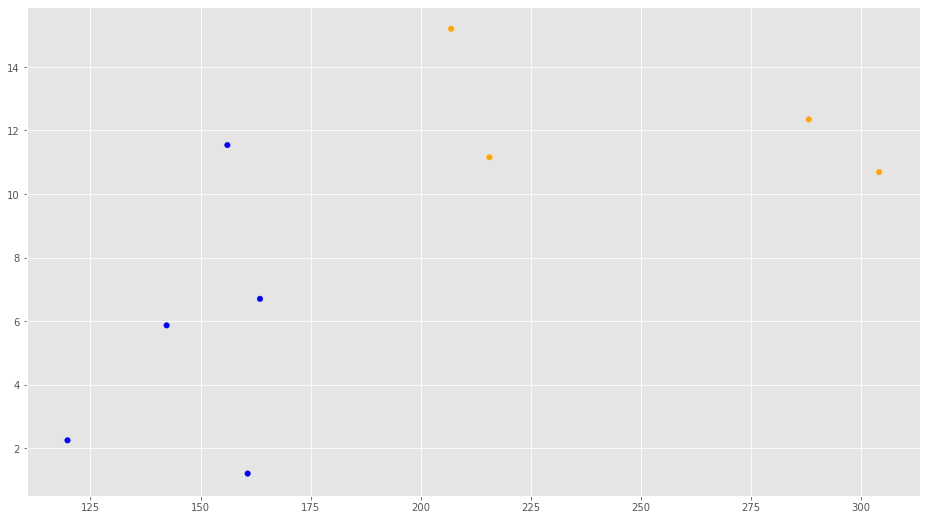

In [38]:
colores=['orange','blue']
tamanios=[30,60]

f1 = df['acum_anual'].values
f2 = df['fn_valor_pastoral'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de cantidad de lluvia
asignar=[]
for index, row in df.iterrows():
    if(row['acum_anual']>206):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

## Cómo obtener el mejor valor de k

(sobre todo importante para desempatar o elegir los puntos frontera!)

El el código que viene a continuación, vemos distintos valores k y la precisión obtenida.

([<matplotlib.axis.XTick at 0x7fda9b9da250>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

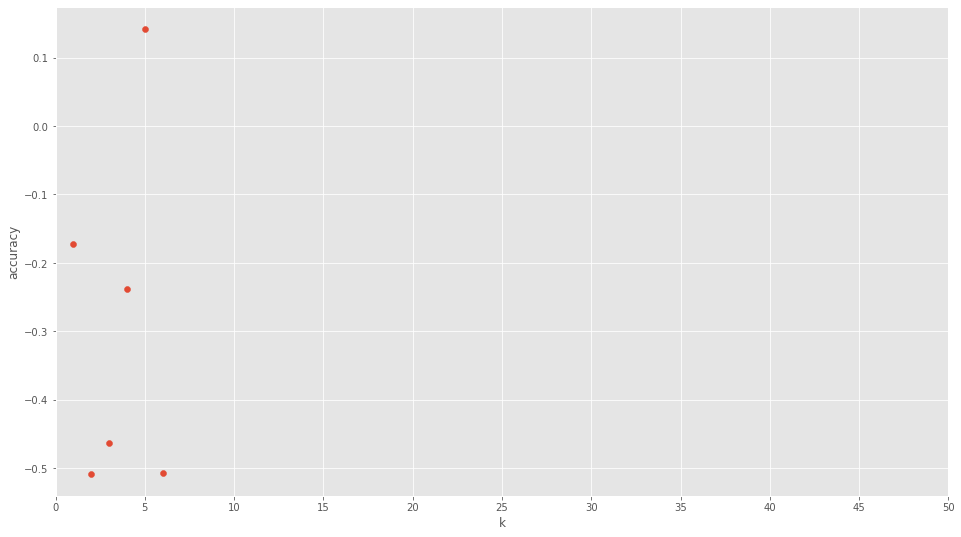

In [40]:
k_range = range(1, 7)
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50])

En la gráfica vemos que con valores k=5 es donde mayor precisión se logra, y aca es re contra re baja.

## Creamos el Modelo

Usemos k-Nearest Neighbor con Scikit Learn

Definimos el valor de k en 5 y creamos nuestro modelo.

In [39]:
n_neighbors = 5

knn = KNeighborsRegressor(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Y_pred_multiple = knn.predict(X_test)

print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test, Y_pred_multiple),4)))
print('MAE:')
print(str(round(mean_absolute_error(y_test, Y_pred_multiple),4)))
print('MSE:')
print(str(round(mean_squared_error(y_test, Y_pred_multiple),4)))
print('RMSE:')
print(str(np.sqrt(round(mean_squared_error(y_test, Y_pred_multiple),4))))
print('R2:')
print(str(round(r2_score(y_test, Y_pred_multiple),4)))

Accuracy of K-NN classifier on training set: 0.03
Accuracy of K-NN classifier on test set: 0.14
Varianza Explicada:
0.3026
MAE:
2.6449
MSE:
7.1403
RMSE:
2.6721339786769676
R2:
0.1419


Vemos que la precisión que nos da es de 3% en el set de entrenamiento y del 14% para el de test.

## METRICAS UTILIZADAS

- *Varianza explicada*: Representa el porcentaje de la varianza de la variable de salida que es explicado por el modelo. O sea esta métrica evalúa la variación o dispersión de los puntos de datos. **explained_variance_score** La mejor puntuación posible es 1.0,los valores más bajos son peores. 
- *Error medio absoluto*: Es la media de las diferencias absolutas entre el valor objetivo y el predicho. Al no elevar al cuadrado, no penaliza los errores grandes, lo que la hace no muy sensible a valores anómalos, por lo que no es una métrica recomendable en modelos en los que se deba prestar atención a éstos. **mean_absolute_error MAE** Mientras mas cercano a cero mejor.
- *Error cuadrático medio*: Es simplemente la media de las diferencias entre el valor objetivo y el predicho al cuadrado. Al elevar al cuadrado los errores, magnifica los errores grandes, por lo que hay que utilizarla con cuidado cuando tenemos valores anómalos en nuestro conjunto de datos. **mean_squared_error MSE** Mientras mas cercano a cero mejor.Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *Raíz cuadrada de la media del error al cuadrado*: Es igual a la raíz cuadrada de la métrica anterior. La ventaja de esta métrica es que presenta el error en las mismas unidades que la variable objetivo, lo que la hace más fácil de entender. **RMSE**. Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *R cuadrado*: también llamado coeficiente de determinación. Esta métrica difiere de las anteriores, ya que compara nuestro modelo con un modelo básico que siempre devuelve como predicción la media de los valores objetivo de entrenamiento. La comparación entre estos dos modelos se realiza en base a la media de los errores al cuadrado de cada modelo. Los valores que puede tomar esta métrica van desde menos infinito a 1. **r2_score R2** Cuanto más cercano a 1 sea el valor de esta métrica, mejor será nuestro modelo. 